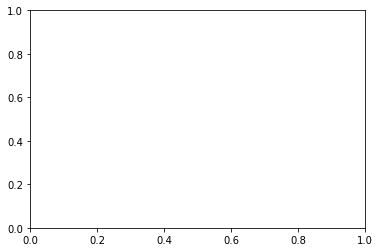

In [1]:
import os
import numpy as np
import pyproj

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm, TwoSlopeNorm, ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm

import netCDF4 as nc
import pandas as pd
import seaborn as sns
import pickle
from datetime import datetime

# from scipy.stats import binned_statistic_2d

from oceantracker.post_processing.read_output_files import load_output_files
from oceantracker.post_processing.plotting.plot_utilities import add_map_scale_bar
from oceantracker.post_processing.read_output_files.load_output_files import load_grid
from oceantracker.post_processing.read_output_files.load_output_files import load_particle_track_vars
from oceantracker.post_processing.read_output_files.load_output_files import get_case_info_files_from_dir
from oceantracker.post_processing.read_output_files.load_output_files import read_case_info_file
from oceantracker.post_processing.read_output_files.load_output_files import load_grid

In [2]:
sns.set_context('paper', font_scale=.7)
plt.rcParams['text.usetex'] = False

## Map

In [3]:
# get map
map_path = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/dfg_photo/osm_lon_lat.png'
# load_image
map_image = plt.imread(map_path)

# path to model runInfo
path_to_dir = '/scratch/local1/output/22_12_08_retention_v22/22_12_08_retention_v22/22_12_08_retention_v25_C011_caseInfo.json'

# get grid
grid = load_grid(path_to_dir)

# get tracks
tracks = load_output_files.load_particle_track_vars(path_to_dir)

[435679.28621188446, 611672.5148126513] [5904854.379233894, 6017513.09731098]
407
916


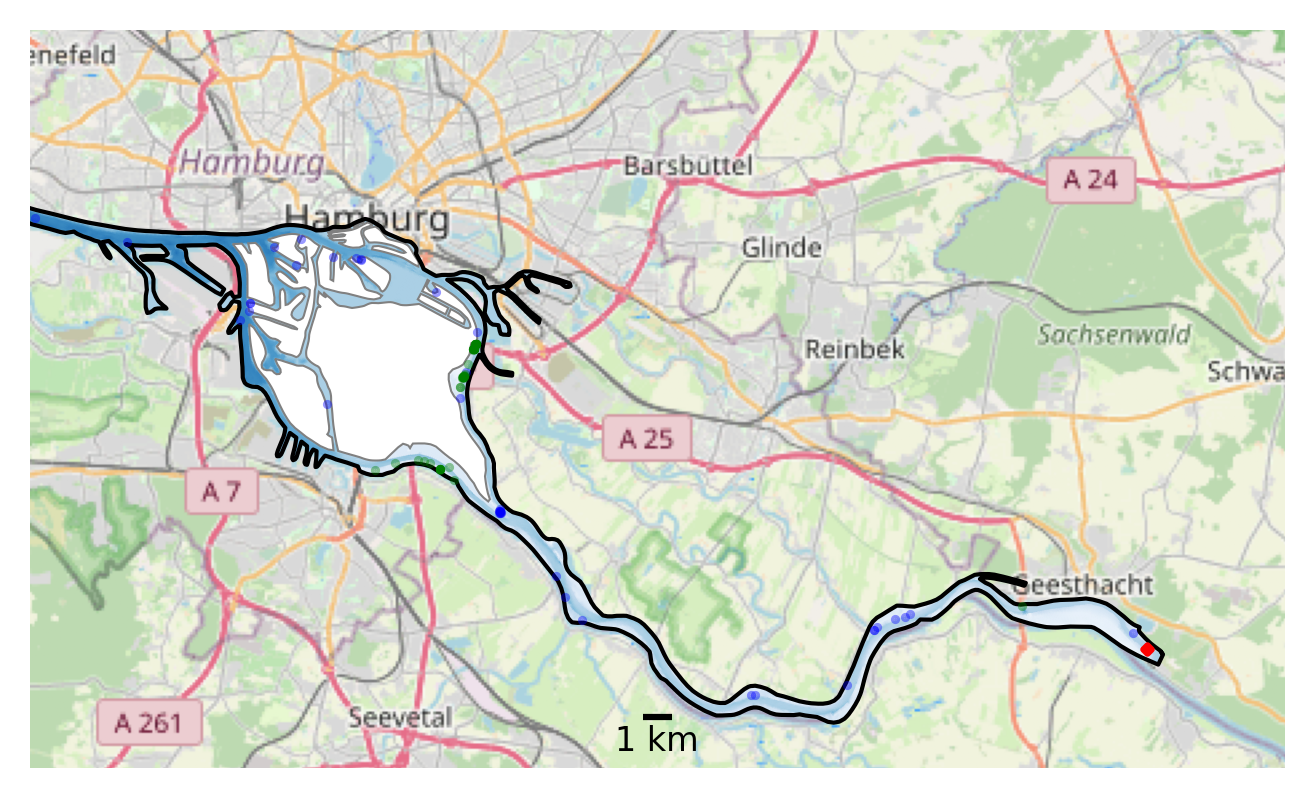

In [38]:
# extend of image
lon = [8.0351,10.7158]
lat = [53.2890, 54.2933]

# find utm for lon lat
utm = pyproj.Proj(proj='utm', zone=32, ellps='WGS84', preserve_units=False)
lon_utm, lat_utm = utm(lon, lat)
print(lon_utm, lat_utm)

# shift image to the left slightly
shift = 1e3
compression = +1.0e3
lon_utm = [lon_utm[0]+shift, lon_utm[1]+shift+compression]
# shift image down a bit
shift = -1e3
compression = 1.0e3
lat_utm = [lat_utm[0]+shift+compression, lat_utm[1]+shift]



# loading particles 
time_step = 36

x = tracks['x'][time_step,:,:2]
status = tracks['status'][time_step,:]

moving = x[status == 10]
stranded = x[status == 3]

moving = moving[::4]
stranded = stranded[::4]


# preparing plotting 
color_palette = {'land': (np.asarray([146, 179, 140])/256).tolist(), 'land_edge': [.5, .5, .5]}
window_size =2.5e4
x_min = 555e3
y_min = 5.915e6
axis_lims = [x_min, x_min+window_size*1.7, y_min, y_min+window_size]



fig, ax = plt.subplots(figsize=(7,3),dpi=300)

# plot map
plt.imshow(map_image, extent=[lon_utm[0], lon_utm[1], lat_utm[0], lat_utm[1]])

# fill islands
for g in grid['grid_outline']['islands']:
    ax.fill(g['points'][:, 0], g['points'][:, 1], edgecolor=color_palette['land_edge'], facecolor='white', linewidth=0.5, zorder=10)

# domain outline
ax.plot(grid['grid_outline']['domain']['points'][:, 0], grid['grid_outline']['domain']['points'][:, 1], c=[0, 0, 0], linewidth=1, zorder=11)

# # depth background
pc = ax.tripcolor(grid['x'][:,0], grid['x'][:,1], grid['water_depth'], triangles=grid['triangles'], shading='gouraud', cmap='Blues', zorder=3)

# add red dot at bottom right in geesthacht with a diamond
plt.scatter([592835],[5919030],c='r',zorder=15,s=2,marker='D')

# ax.triplot(grid['x'][:, 0], grid['x'][:, 1], grid['triangles'], color=(0.8, 0.8, 0.8), linewidth=.5, zorder=1)
add_map_scale_bar(axis_lims, ax=ax)

plt.scatter(moving[:,0],moving[:,1],zorder=15,s=0.5,c='b',alpha=0.4)
plt.scatter(stranded[:,0],stranded[:,1],zorder=16,s=0.5,c='g',alpha=0.4)


# modify fig frame
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xlim(axis_lims[:2])
ax.set_ylim(axis_lims[2:])

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_aspect('equal', 'box')

plt.tight_layout()
plt.savefig(f'model_domain_zoom.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)

[435679.28621188446, 611672.5148126513] [5904854.379233894, 6017513.09731098]
407
916


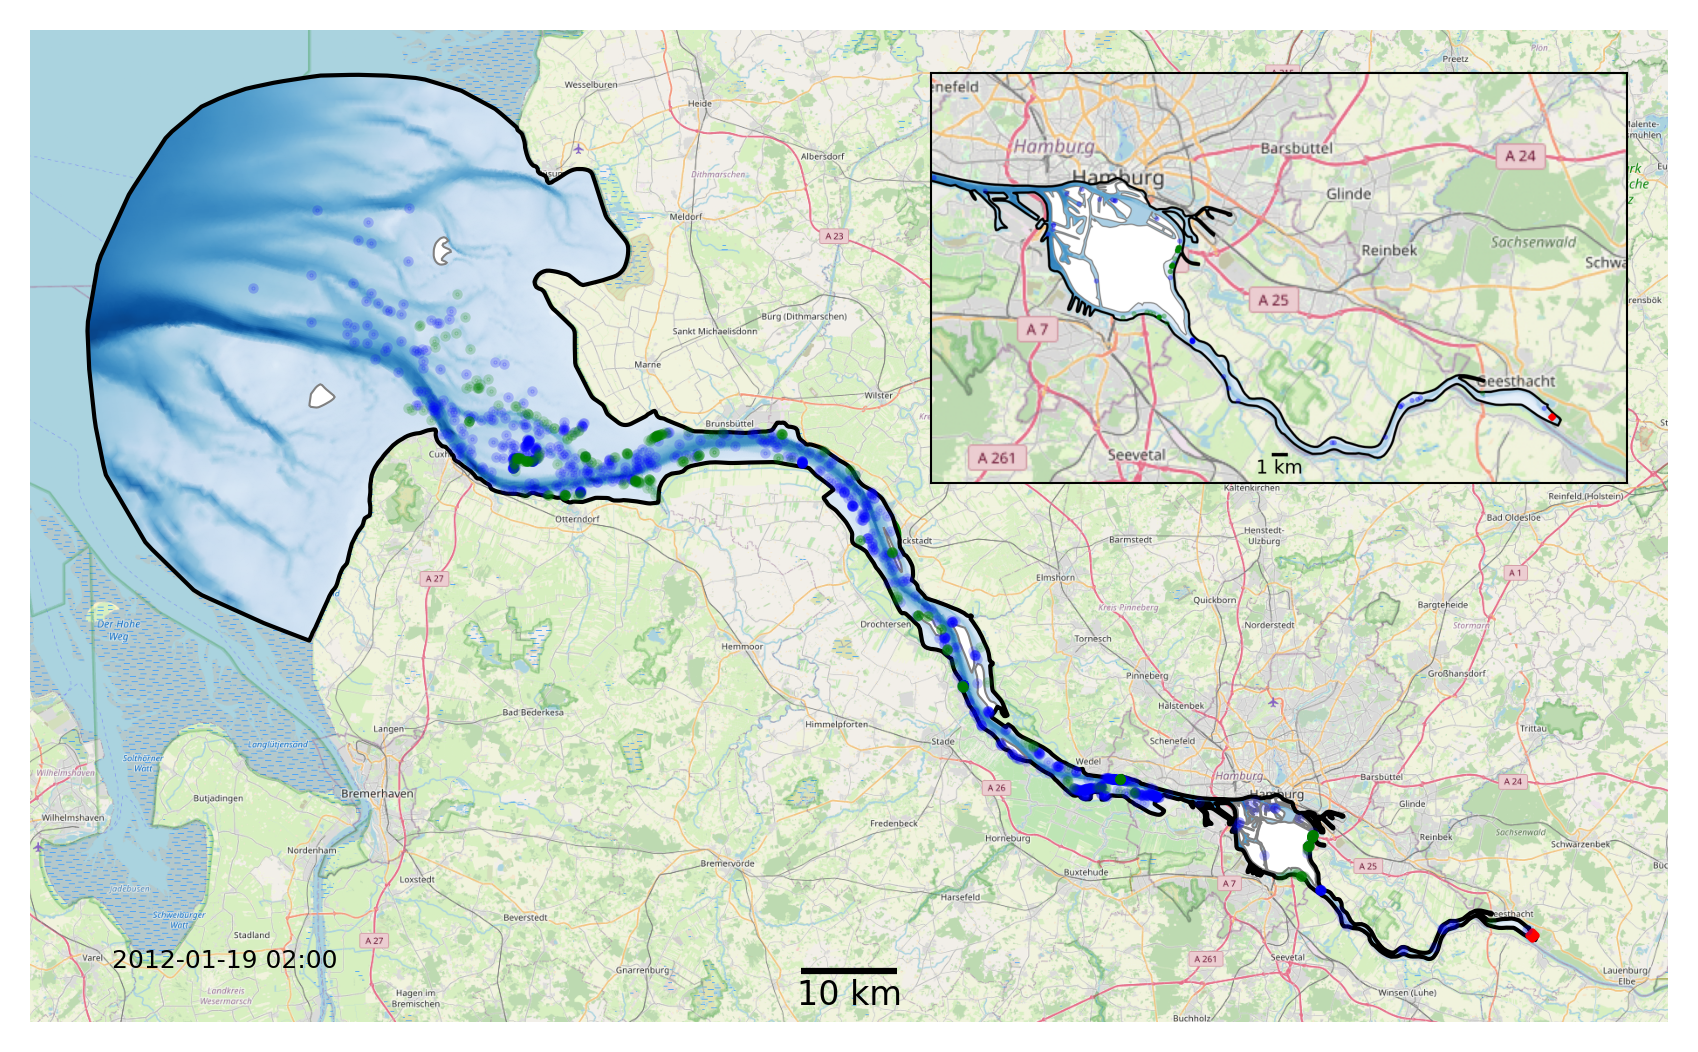

In [39]:
# get map
map_path = '/home/zmaw/u301513/Documents/scr/phd/bicest/oceantracker/experiments/auxiliaries/dfg_photo/osm_lon_lat.png'
# load_image
map_image = plt.imread(map_path)
zoom_image = plt.imread('model_domain_zoom.png')

# path to model runInfo
path_to_dir = '/scratch/local1/output/22_12_08_retention_v22/22_12_08_retention_v22/22_12_08_retention_v25_C011_caseInfo.json'

# get grid
grid = load_grid(path_to_dir)

# get tracks
tracks = load_output_files.load_particle_track_vars(path_to_dir)



# extend of image
lon = [8.0351,10.7158]
lat = [53.2890, 54.2933]

# find utm for lon lat
utm = pyproj.Proj(proj='utm', zone=32, ellps='WGS84', preserve_units=False)
lon_utm, lat_utm = utm(lon, lat)
print(lon_utm, lat_utm)

# shift image to the left slightly
shift = 1e3
compression = +1.0e3
lon_utm = [lon_utm[0]+shift, lon_utm[1]+shift+compression]
# shift image down a bit
shift = -1e3
compression = 1.0e3
lat_utm = [lat_utm[0]+shift+compression, lat_utm[1]+shift]



time_step = 36

x = tracks['x'][time_step,:,:2]
status = tracks['status'][time_step,:]

moving = x[status == 10]
stranded = x[status == 3]

moving = moving[::4]
stranded = stranded[::4]



color_palette = {'land': (np.asarray([146, 179, 140])/256).tolist(), 'land_edge': [.5, .5, .5]}
window_size = 1e5
x_min = 437e3
y_min = 5.91e6
axis_lims = [x_min, x_min+window_size*1.7, y_min, y_min+window_size*1.03]



fig, ax = plt.subplots(figsize=(6,4),dpi=300)

# plot map
plt.imshow(map_image, extent=[lon_utm[0], lon_utm[1], lat_utm[0], lat_utm[1]])
# add green dot at center
plt.plot(np.mean(lon_utm), np.mean(lat_utm), 'go')

# fill islands
for g in grid['grid_outline']['islands']:
    ax.fill(g['points'][:, 0], g['points'][:, 1], edgecolor=color_palette['land_edge'], facecolor='white', linewidth=0.5, zorder=10)

# domain outline
ax.plot(grid['grid_outline']['domain']['points'][:, 0], grid['grid_outline']['domain']['points'][:, 1], c=[0, 0, 0], linewidth=1, zorder=11)

# # depth background
pc = ax.tripcolor(grid['x'][:,0], grid['x'][:,1], grid['water_depth'], triangles=grid['triangles'], shading='gouraud', cmap='Blues', zorder=3)

# add red dot at bottom right in geesthacht with a diamond
plt.scatter([592835],[5919030],c='r',zorder=15,s=2,marker='D')

# ax.triplot(grid['x'][:, 0], grid['x'][:, 1], grid['triangles'], color=(0.8, 0.8, 0.8), linewidth=.5, zorder=1)
add_map_scale_bar(axis_lims, ax=ax)

# add zoom in the upper right corner
axins = ax.inset_axes([0.55, 0.525, 0.425, 0.45])
axins.imshow(zoom_image)
axins.xaxis.set_ticks_position('none')
axins.yaxis.set_ticks_position('none')
axins.xaxis.set_tick_params(labelbottom=False)
axins.yaxis.set_tick_params(labelleft=False)
# spine line thinner
for key, spine in axins.spines.items():
    spine.set_linewidth(0.5)


plt.scatter(moving[:,0],moving[:,1],zorder=15,s=1,c='b',alpha=0.2)
plt.scatter(stranded[:,0],stranded[:,1],zorder=16,s=1,c='g',alpha=0.2)


# modify fig frame
for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.set_xlim(axis_lims[:2])
ax.set_ylim(axis_lims[2:])

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_aspect('equal', 'box')

# time stamp in the lower left corner
t = tracks['time'][time_step]
t = datetime.fromtimestamp(t)
t = t.strftime('%Y-%m-%d %H:%M')
ax.text(0.05, 0.05, t, transform=ax.transAxes, fontsize=6, verticalalignment='bottom', horizontalalignment='left', color='k', zorder=20)


plt.tight_layout()
plt.savefig(f'model_domain.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)



## Bathymetry

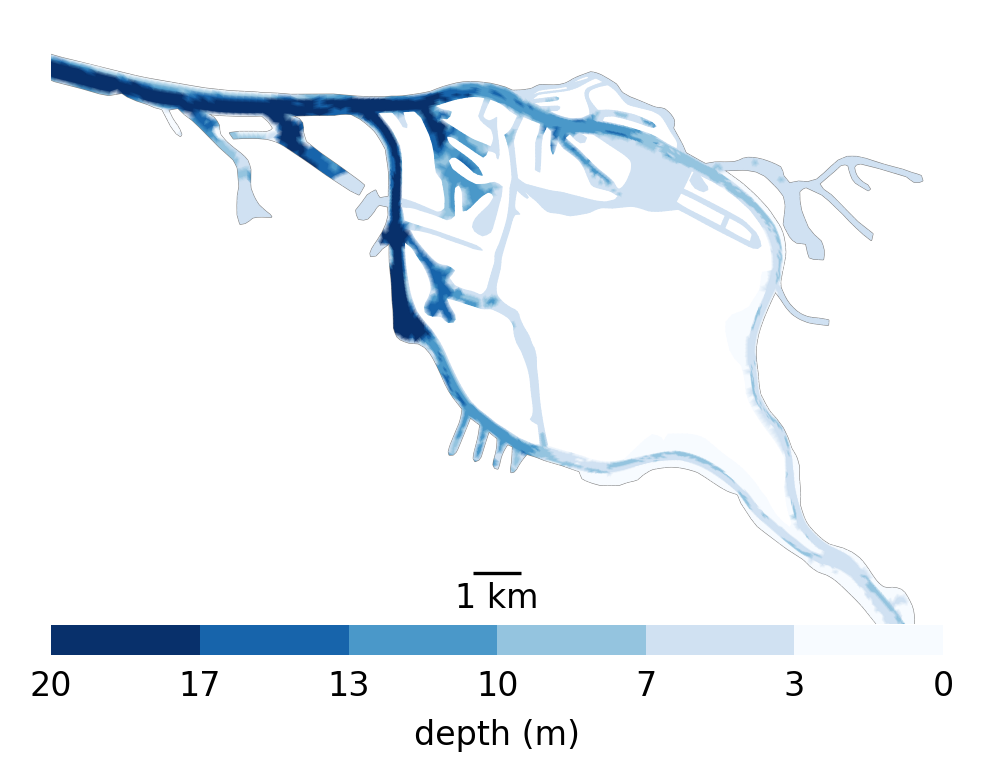

In [4]:
path_to_dir = '/work/uh0296/u301513/ot_output/22_12_08_retention_v25/22_12_08_retention_v25_C001_caseInfo.json'
grid = load_grid(path_to_dir)

window_size = 1e5/8
x_min = 555e3
y_min = 5.922e6
axis_lims = [x_min, x_min+window_size*1.5, y_min, y_min+window_size]


# depth coloring
depth = grid['water_depth']
# vmax = np.nanmax(depth[sel])
color_map = 'Blues'
color_palette = {'land': (np.asarray([146, 179, 140])/256).tolist(), 'land_edge': [.5, .5, .5]}

cmap = cm.get_cmap(color_map)
levels = 6
colors = cmap(np.linspace(0, 1, levels))
color_map = ListedColormap(colors)
norm = BoundaryNorm(np.linspace(0, 20, levels+1), color_map.N)



fig, ax = plt.subplots(figsize=(8.3/2.53, (8.3/0.5)/2.53), dpi=300)

# domain outline
ax.plot(grid['grid_outline']['domain']['points'][:, 0], grid['grid_outline']['domain']['points'][:, 1], 
        c=color_palette['land_edge'], linewidth=0.5, zorder=3)

# depth
pc = ax.tripcolor(grid['x'][:,0], grid['x'][:,1], depth, 
                  triangles=grid['triangles'], shading='gouraud',
                  cmap=color_map, edgecolors='none', norm=norm, zorder=3)
cbar = fig.colorbar(pc, ax=ax, fraction=0.1, pad=0.0005, orientation='horizontal', aspect=30)
cbar.outline.set_visible(False)
cbar.ax.set_xlabel('depth (m)',fontsize=8)


# layouting
cbar.ax.xaxis.set_major_formatter('{x:.0f}')
# cbar ticks font size smaller
cbar.ax.tick_params(labelsize=8)
# swap direction of color bar
cbar.ax.invert_xaxis()
# make cbar ticks shorter
cbar.ax.tick_params(length=0)

add_map_scale_bar(axis_lims, ax=ax)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(axis_lims[:2])
ax.set_ylim(axis_lims[2:])

for key, spine in ax.spines.items():
    spine.set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)
ax.set_aspect('equal', 'box')

plt.tight_layout()
plt.savefig('harbor_small.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)


## retention success

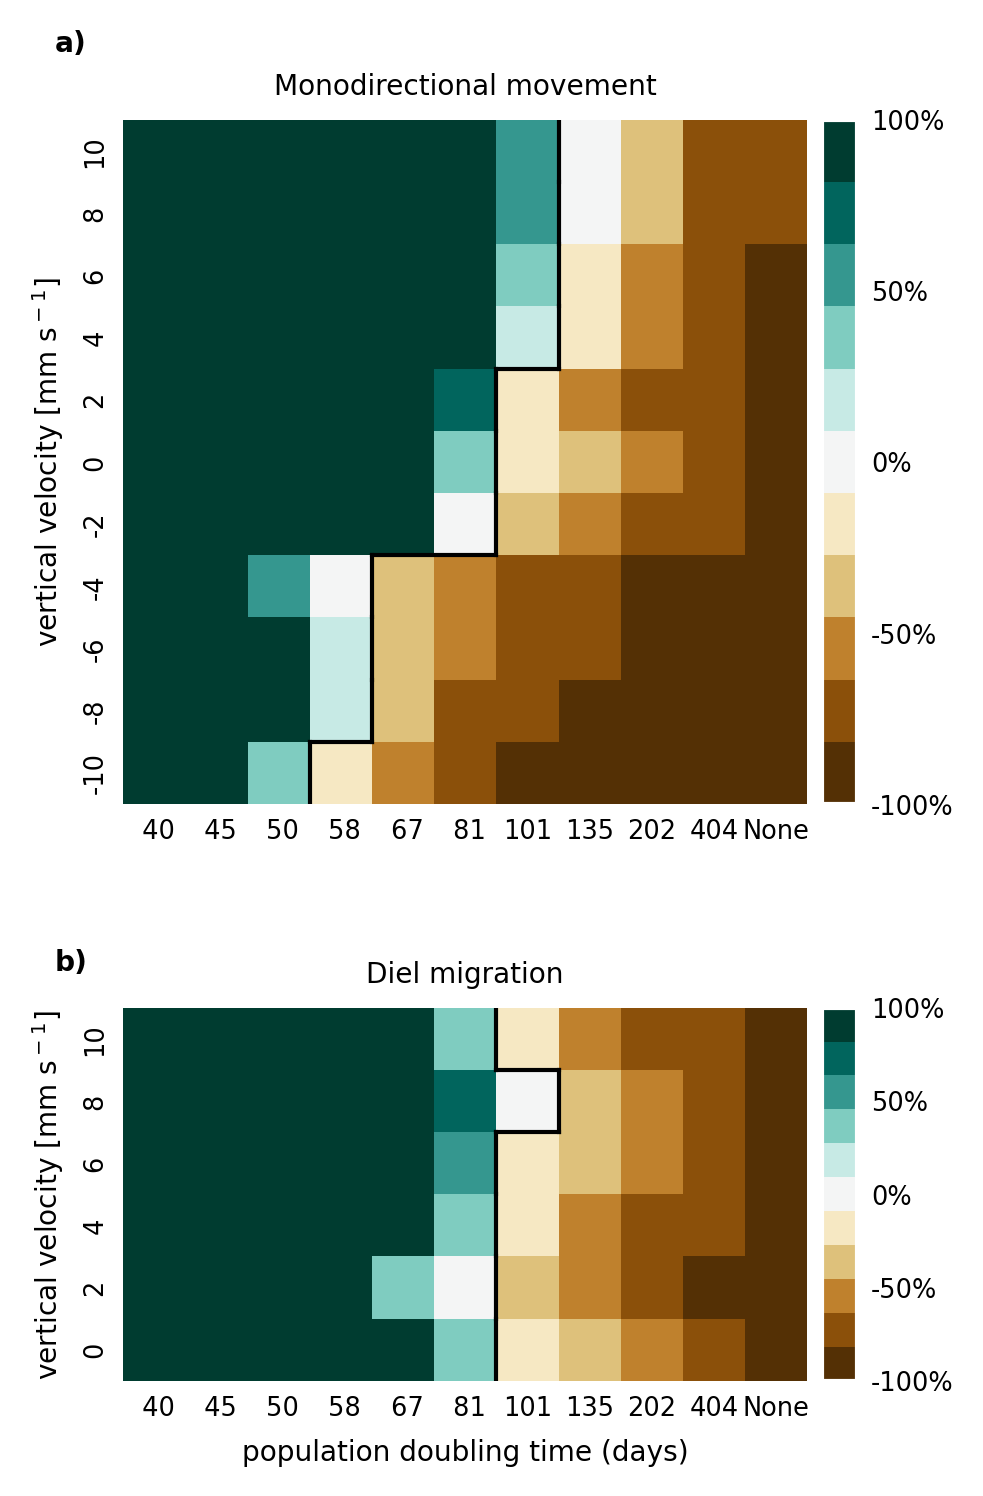

In [4]:
path_mono = '/work/uh0296/u301513/ot_output/22_12_08_retention_v25/retention_success_sa_mono.pkl'
path_diel = '/work/uh0296/u301513/ot_output/22_12_08_retention_v25/retention_success_sa_diel.pkl'


def load_data(path):
    with open(path, 'rb') as f:
        retention_success_sa = pickle.load(f)
        surviving, threshold, split_frac, vert_vel = retention_success_sa
        surviving = np.flip(surviving, axis=0)
        vert_vel = np.flip(vert_vel, axis=0)
        return surviving, threshold, split_frac, vert_vel

def get_xticklabels(split_frac):
    xticklabels = []
    for item in split_frac:
        if item != 0:
            xticklabels.append('{:3.0f}'.format((1 / item) * (1 / 1440)))
        else:
            xticklabels.append('None')
    return xticklabels



# Load the data
surviving_mono, threshold_mono, split_frac_mono, vert_vel_mono = load_data(path_mono)
surviving_diel, threshold_diel, split_frac_diel, vert_vel_diel = load_data(path_diel)

# Adjust diel data
surviving_diel = surviving_diel[vert_vel_diel >= 0, :]
vert_vel_diel = vert_vel_diel[vert_vel_diel >= 0]

# Get xticklabels
xtickslabels_mono = get_xticklabels(split_frac_mono)
xtickslabels_diel = get_xticklabels(split_frac_diel)

# Create the figure and axes objects with different heights for each subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3/2.53, (8.3*1.6)/2.53), dpi=300, sharex=False, 
                               gridspec_kw={'height_ratios': [2, 1]})

# Define common norm and colormap
vmin = min(threshold_mono - threshold_mono, threshold_diel - threshold_diel)
vmax = max(threshold_mono + threshold_mono, threshold_diel + threshold_diel)
threshold = (vmin + vmax) / 2
norm = TwoSlopeNorm(vmin=vmin, vcenter=threshold, vmax=vmax)

# discretize color map to only use 10 colors
cmap = cm.get_cmap('BrBG')  # convert string to colormap
colors = cmap(np.linspace(0, 1, 11))
cmap = ListedColormap(colors)

# Create the first heatmap (mono)
sns.heatmap(surviving_mono, cmap=cmap, norm=norm, 
            xticklabels=xtickslabels_mono, 
            yticklabels=[int(item*1e3) for item in vert_vel_mono], 
            square=True, ax=ax1, cbar=False)

# Create the second heatmap (diel)
sns.heatmap(surviving_diel, cmap=cmap, norm=norm, 
            xticklabels=xtickslabels_diel, 
            yticklabels=[int(item*1e3) for item in vert_vel_diel], 
            square=True, ax=ax2, cbar=False)

# Set titles
ax1.set_title('Monodirectional movement')
ax2.set_title('Diel migration')

# Set subfigure labels
ax1.text(-0.1, 1.1, 'a)', transform=ax1.transAxes, weight='bold')
ax2.text(-0.1, 1.1, 'b)', transform=ax2.transAxes, weight='bold')

# Set labels
ax1.set_xlabel('')
ax1.set_ylabel('vertical velocity [mm s$^-$$^1$]')
ax2.set_xlabel('population doubling time (days)')
ax2.set_ylabel('vertical velocity [mm s$^-$$^1$]')

# Add colorbars
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cbar1 = fig.colorbar(ax1.collections[0], cax=cax1)
#make frame of cbar white
cbar1.outline.set_edgecolor('white')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cbar2 = fig.colorbar(ax2.collections[0], cax=cax2)
cbar2.outline.set_edgecolor('white')

# Set colorbar ticks and labels
new_labels = np.arange(vmin, vmax+threshold/2., threshold/2.)
cbar1.set_ticks(new_labels)
cbar2.set_ticks(new_labels)

# Calculate the new labels as percentages of the threshold
new_labels = [(label - threshold) / threshold * 100 for label in new_labels]
new_labels = ['{:.0f}%'.format(label) for label in new_labels]

# Set the new labels
cbar1.set_ticklabels(new_labels)
cbar2.set_ticklabels(new_labels)

# remove tick marks on cbar
cbar1.ax.tick_params(axis='both', which='both', length=0)
cbar2.ax.tick_params(axis='both', which='both', length=0)

# disable x and y tick marks
ax1.tick_params(axis='both', which='both', length=0)
ax2.tick_params(axis='both', which='both', length=0)

# add black lines between the negative and positive growth
# first get the pop doubling time for the threshold
above_threshold = surviving_mono > threshold
# find the index where the boolean changes from True to False
diff = np.diff(above_threshold)
index = np.where(diff)[1]
# plot vlines at index one column high
for ii,idx in enumerate(index):
    ax1.axvline(x=idx+1, color='k', linewidth=1, ymax=1-ii/len(vert_vel_mono), ymin = 1-(ii+1)/len(vert_vel_mono))
# add horizontal lines between the different vertical velocities
for ii,idx in enumerate(index):
    if ii == len(index)-1:
        break
    ax1.axhline(y=ii+1, color='k', linewidth=1, xmax=(index[ii]+1)/len(split_frac_mono), xmin = (index[ii+1]+1)/len(split_frac_mono))

# add black lines between the negative and positive growth
# first get the pop doubling time for the threshold
above_threshold = surviving_diel > threshold
# find the index where the boolean changes from True to False
diff = np.diff(above_threshold)
index = np.where(diff)[1]
# plot vlines at index one column high
for ii,idx in enumerate(index):
    ax2.axvline(x=idx+1, color='k', linewidth=1, ymax=1-ii/6, ymin = 1-(ii+1)/6)
# add horizontal lines between the different vertical velocities
for ii,idx in enumerate(index):
    if ii == len(index)-1:
        break
    ax2.axhline(y=ii+1, color='k', linewidth=1, xmax=(index[ii]+1)/len(split_frac_diel), xmin = (index[ii+1]+1)/len(split_frac_diel))



# Save the figure
plt.tight_layout()
plt.savefig('retention_success_combined.png', dpi=300, bbox_inches='tight')

## hexbin plot

In [4]:
# get list of all cases in run
path_to_dir = '/work/uh0296/u301513/ot_output/22_12_08_retention_v25'
case_list = load_output_files.get_case_info_files_from_dir(path_to_dir)

In [3]:
# track_x = np.empty((0, 3))
# track_age = np.empty((0,))
# track_dbf = np.empty((0,))

# for ii, case in enumerate(case_list):

#     if ii > int(186):
#         break
    
#     track = load_output_files.load_particle_track_vars(case,var_list=['age','tide'],fraction_to_read=0.1)

#     alive = track['status'] > 0
#     track_x = np.concatenate((track_x, track['x'][alive]), axis=0)
#     track_age = np.concatenate((track_age, track['age'][alive]), axis=0)
#     track_dbf = np.concatenate((track_dbf,track['x'][alive,2] - track['tide'][alive]),axis=0)

#     print('case ' + str(ii+1) + ' of ' + str(len(case_list)) + ' cases')
#     print('n_particles = ' + str(track_x.shape[0]))

# # save to pickle file
# with open('dump.pkl','wb') as f:
#     pickle.dump([track_x, track_age, track_dbf],f)

# read pickle 
with open('dump.pkl','rb') as f:
    track_x, track_age, track_dbf = pickle.load(f)

In [4]:
def rotate_points(x, y, label, angle, point):

    x_rotated = (x - point[0]) * np.cos(angle) - (y - point[1]) * np.sin(angle) + point[0]
    y_rotated = (x - point[0]) * np.sin(angle) + (y - point[1]) * np.cos(angle) + point[1]

    for key, value in label.items():
        x_rotated_label = (value[0] - point[0]) * np.cos(angle) - (value[1] - point[1]) * np.sin(angle) + point[0]
        y_rotated_label = (value[0] - point[0]) * np.sin(angle) + (value[1] - point[1]) * np.cos(angle) + point[1]
        label[key] = [x_rotated_label, y_rotated_label]


    return x_rotated, y_rotated, label

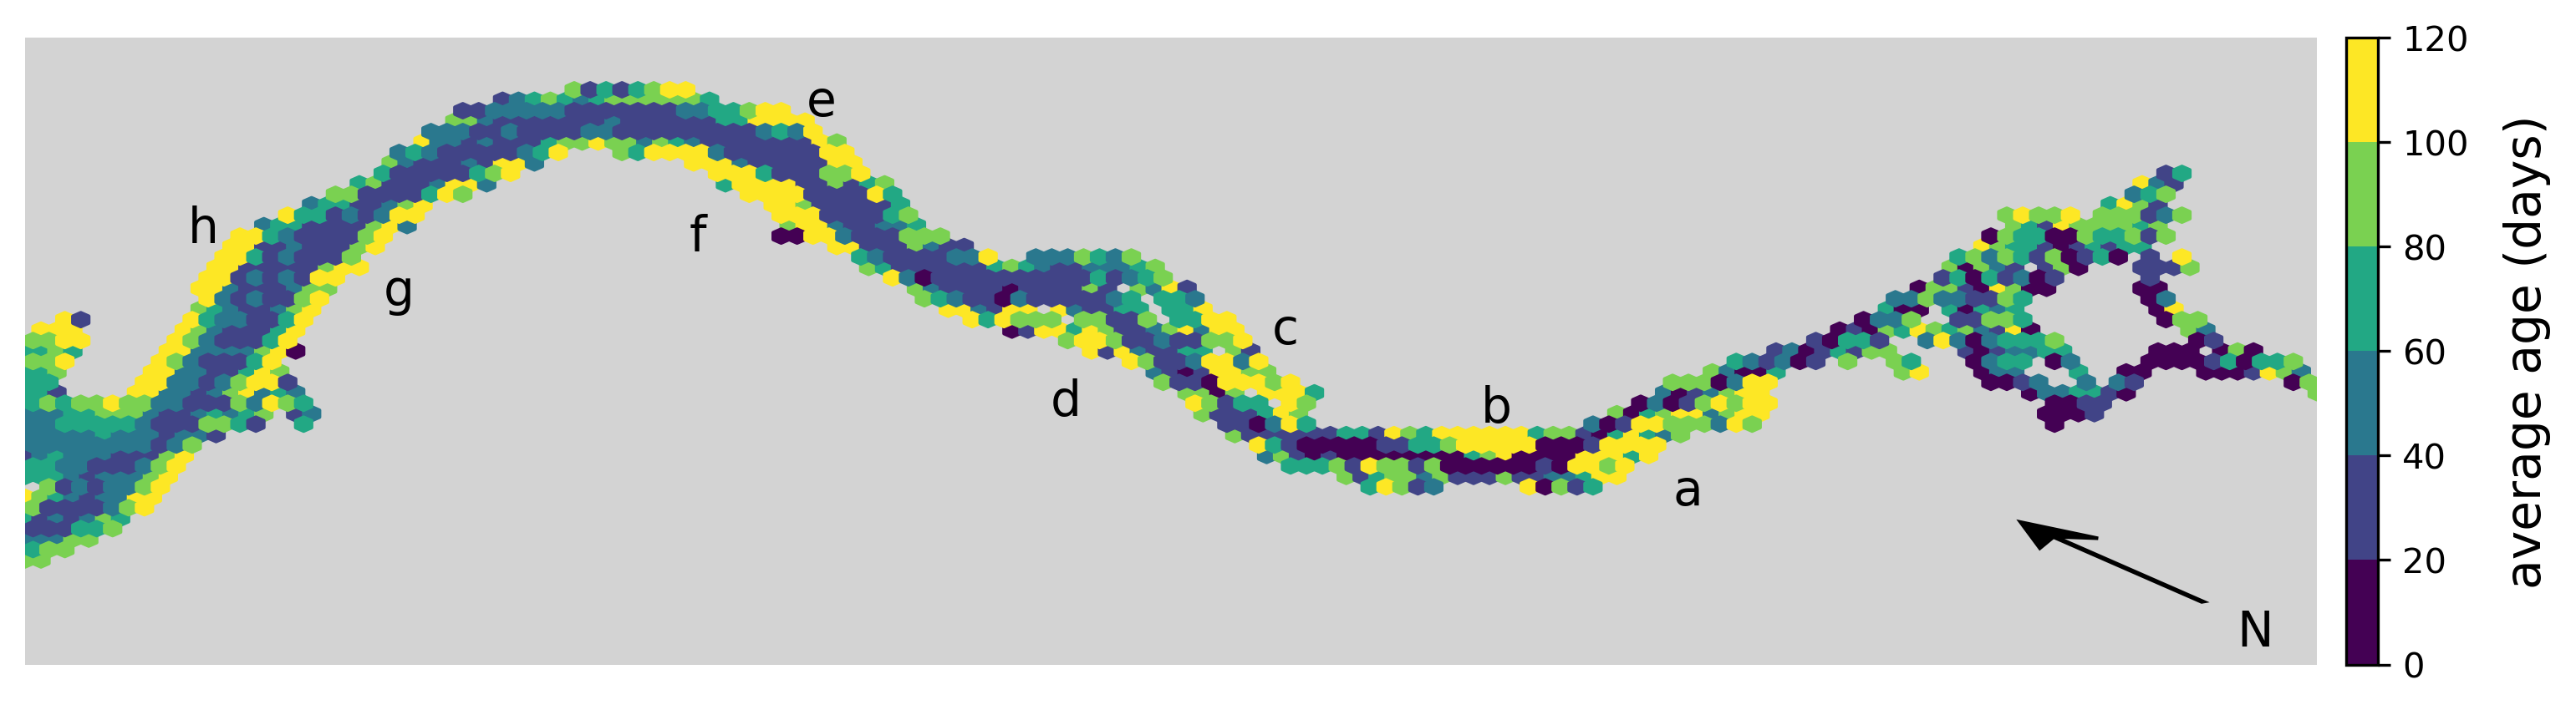

In [7]:
from copy import deepcopy

x = deepcopy(track_x[:,0])
y = deepcopy(track_x[:,1])
age = deepcopy(track_age)

# [5.489e5,5.9312e6] # mühlenberger loch
# [5,403e5,5.9457e6] # haseldorfer binnenelbe

# [5.471e5,5.9383e6] # wedeler marsch
# [5.197e5,5.9619e6] # wischhafen
# [5.319e5,5.9639e6] # stoer
# [5.290e5,5.9490e6] # schwarztonnensand/ ruth
# [5.0918e5,5.96746e6] # nordkedding
# [5.025e5, 5.9737e6] # neufelder marsch

labels = ['a', 'c', 'b', 'f', 'e', 'd', 'g', 'h']
x_coords = [5.489e5, 5.383e5, 5.440e5, 5.197e5, 5.270e5, 5.290e5, 5.080e5, 5.025e5]
y_coords = [5.9312e6, 5.9457e6, 5.9383e6, 5.9619e6, 5.9639e6, 5.9480e6, 5.9665e6, 5.9730e6]

labels_dict = {}
for label, x_coord, y_coord in zip(labels, x_coords, y_coords):
    labels_dict[label] = [x_coord, y_coord]

x, y, labels_rotated = rotate_points(x, y, labels_dict, 32 * np.pi / 180, [5.489e5,5.9312e6])

x = x.flatten()
y = y.flatten()
# drop all nan values
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

# same for age
age = age.flatten()
age = age[~np.isnan(age)]
# transform age from seconds to days
age = age / (60*60*24)

# define axis limits with fixes aspect ratio
xlim = [4.80e5, 5.75e5]
ylim = [5.924e6, 5.950e6]

# slite down to only 10000 particles
x = x[::10]
y = y[::10]
age = age[::10]

# select those in between axis limits
in_window = np.logical_and(x >= xlim[0], x <= xlim[1])
in_window = np.logical_and(in_window, y >= ylim[0])
in_window = np.logical_and(in_window, y <= ylim[1])

x = x[in_window]
y = y[in_window]
age = age[in_window]

aspect_ratio = (np.max(x) - np.min(x)) / (np.max(y) - np.min(y))



# -- BINNING --

# Define the number of bins
num_bins = 30

# Create a 2D histogram with hexagonal bins
cmap = cm.get_cmap('viridis',6)  # choose the colormap you want to use


# -- PLOTTING --

# 12cm in width
fig,ax = plt.subplots(figsize=(12 , 12/(aspect_ratio*0.85)), dpi=300)
ax.set_facecolor('lightgray')


# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove axis labels and ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

hb = ax.hexbin(x, y, C=age, reduce_C_function=np.mean,
               gridsize=[int(num_bins*aspect_ratio),num_bins], cmap=cmap, vmin=0, vmax=120,
               extent=[xlim[0], xlim[1], ylim[0], ylim[1]], zorder=3)
cb = fig.colorbar(hb, ax=ax, label='average age (days)',pad=0.01)
# add cbar label
cb.ax.set_ylabel('average age (days)', rotation=90, labelpad=10,fontsize=14)

# add an arrow pointing 32 degree north in the top center
arrow_pos = [0.95, 0.1]
ax.arrow(arrow_pos[0],arrow_pos[1], -np.sin(32 * np.pi / 180)*0.15, np.cos(32 * np.pi / 180)*0.15, 
         transform=ax.transAxes, length_includes_head=True, overhang=0.3,
         head_width=0.03, head_length=0.04, color='k', zorder=4)

# add N to arrow
ax.text(arrow_pos[0]+0.015,arrow_pos[1]-0.07, 'N', transform=ax.transAxes, fontsize=14, zorder=4)

# add labels
for key, value in labels_rotated.items():
    ax.text(value[0], value[1], key, ha='center', va='center', zorder=4, fontsize=14)

# fix aspect ratio
ax.set_aspect('equal', 'box')




plt.tight_layout()
# plt.show()
plt.savefig('age_hexbin_viridis6.png', dpi=300, bbox_inches='tight')


## Violin plot

In [ ]:
# get list of all cases in run
path_to_dir = '/work/uh0296/u301513/ot_output/22_12_08_retention_v25'
case_list = load_output_files.get_case_info_files_from_dir(path_to_dir)

In [ ]:
# track_x = np.empty((0, 3))
# track_age = np.empty((0,))
# track_dbf = np.empty((0,))

# for ii, case in enumerate(case_list):

#     if ii > int(186):
#         break
    
#     track = load_output_files.load_particle_track_vars(case,var_list=['age','tide'],fraction_to_read=0.1)

#     alive = track['status'] > 0
#     track_x = np.concatenate((track_x, track['x'][alive]), axis=0)
#     track_age = np.concatenate((track_age, track['age'][alive]), axis=0)
#     track_dbf = np.concatenate((track_dbf,track['x'][alive,2] - track['tide'][alive]),axis=0)

#     print('case ' + str(ii+1) + ' of ' + str(len(case_list)) + ' cases')
#     print('n_particles = ' + str(track_x.shape[0]))

# # save to pickle file
# with open('dump.pkl','wb') as f:
#     pickle.dump([track_x, track_age, track_dbf],f)

# read pickle 
with open('dump.pkl','rb') as f:
    track_x, track_age, track_dbf = pickle.load(f)

In [17]:
long_lived =   track_age > 3*60*60*24*28
short_lived = ~long_lived

track_dbf_short_living = track_dbf[short_lived]
track_dbf_long_living = track_dbf[long_lived]

short = track_dbf_short_living
long = track_dbf_long_living


In [18]:
print(len(short),len(long))

62233 62557


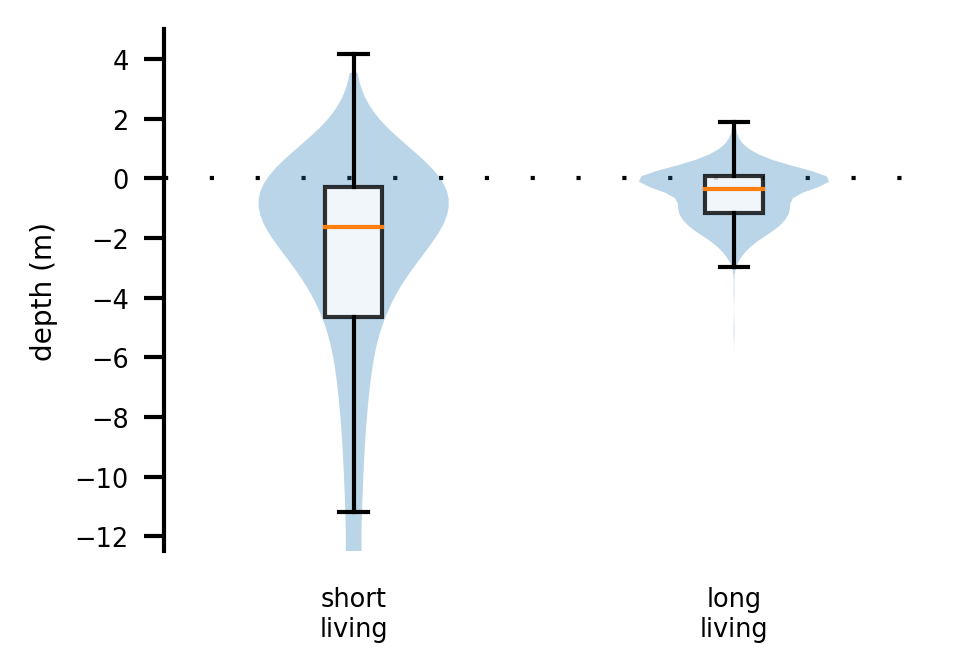

In [25]:
fig,ax = plt.subplots(figsize=(8.3/2.53, (8.3/1.4)/2.53),dpi=300)

plt.violinplot([short[::100],long[::100]],showmeans=False,showmedians=False,showextrema=False)

# ax.set_title('Plankton depth below surface')
box1 = ax.boxplot(short,positions=[1],labels=['short\nliving'],
                #whis=(0,100)
                showfliers=False,
                patch_artist=True,
                notch=False,
                zorder=10
                )
box2 = ax.boxplot(long,positions=[2],labels=['long\nliving'],
                #whis=(0,100)
                showfliers=False,
                patch_artist=True,
                notch=False,
                zorder=10
                )
ax.set_ylabel('depth (m)')

# remove spine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(False)

# remove x ticks
ax.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=True)
# remove y ticks
ax.tick_params(axis='y',which='both',left=True,right=False,labelleft=True)

# add horizontal grid lines
# ax.grid(axis='y',color='black',linestyle=(0, (1,10)),linewidth=0.0,zorder=0)
# add horizontal 0 line
ax.axhline(y=0, color='k', linewidth=1, zorder=0, linestyle=(0, (1, 10)))

# fill boxplot with white
for element in ['boxes']:
    plt.setp(box1[element], color='black')
    plt.setp(box2[element], color='black')

for patch in box1['boxes']:
    patch.set(facecolor='white')
for patch in box2['boxes']:
    patch.set(facecolor='white')

# set box alpha to 0.7
for element in ['boxes']:
    plt.setp(box1[element], alpha=0.8)
    plt.setp(box2[element], alpha=0.8)

ax.set_ylim(-12.5,5)

# set tight_layout
plt.tight_layout()

plt.savefig('retention_boxplot.png',dpi=300)


